In [85]:
import numpy as np
import pandas as pd

In [86]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"

In [87]:
filename = data.split('/')[-1]
filename

'course_lead_scoring.csv'

In [88]:
import os

if os.path.exists(filename):
    print("File already exists.")
else:
    !wget $data

File already exists.


In [89]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [90]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [91]:
df.lead_source = df.lead_source.fillna('NA')

In [92]:
df.industry = df.industry.fillna('NA')
df.annual_income = df.annual_income.fillna(0.0)
df.employment_status = df.employment_status.fillna('NA')
df.location = df.location.fillna('NA')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [93]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

# Q1

In [94]:
df.industry.mode()

0    retail
Name: industry, dtype: object

# Q2

In [95]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [96]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
categorical = ['lead_source', 'industry', 'employment_status', 'location']

In [97]:
correlation_matrix = df[numerical].corr()
correlation_matrix

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


<Axes: >

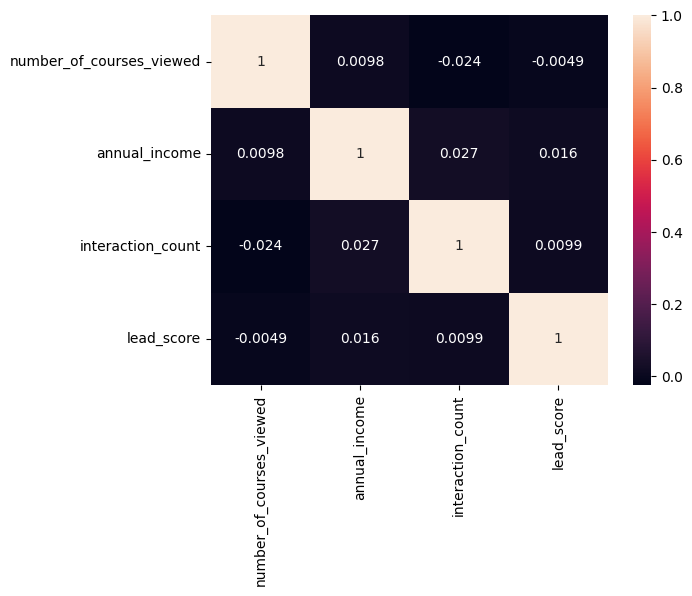

In [98]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
# highest correlation between annual_income and interaction_count

# Split the data

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [101]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [102]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [103]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1077,paid_ads,retail,0,58472.0,student,middle_east,5,0.03,0
463,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77,1
842,paid_ads,technology,3,81973.0,employed,north_america,2,0.59,1
835,NA,technology,1,74956.0,employed,europe,3,0.34,1
837,organic_search,retail,3,59335.0,student,australia,1,0.98,1


In [104]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [105]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [106]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

# Q3

In [107]:
from sklearn.metrics import mutual_info_score

In [108]:
for c in categorical:
    mi = mutual_info_score(y_train, df_train[c])
    mi = round(mi, 2)
    print(f'{c:<20} {mi}')

lead_source          0.04
industry             0.01
employment_status    0.01
location             0.0


# Q4

In [109]:
from sklearn.feature_extraction import DictVectorizer

In [110]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [111]:
train_dicts[0]

{'lead_source': 'paid_ads',
 'industry': 'retail',
 'employment_status': 'student',
 'location': 'middle_east',
 'number_of_courses_viewed': 0,
 'annual_income': 58472.0,
 'interaction_count': 5,
 'lead_score': 0.03}

In [112]:
dv = DictVectorizer(sparse=False)

In [113]:
X_train = dv.fit_transform(train_dicts)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [116]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [117]:
y_pred = model.predict_proba(X_val)

In [118]:
# First column is the probability of class 0 and the second is the probability of class 1.
y_pred

array([[0.38807837, 0.61192163],
       [0.20017383, 0.79982617],
       [0.46978656, 0.53021344],
       [0.52868521, 0.47131479],
       [0.42933868, 0.57066132],
       [0.55772831, 0.44227169],
       [0.12872331, 0.87127669],
       [0.15116885, 0.84883115],
       [0.16709963, 0.83290037],
       [0.38502199, 0.61497801],
       [0.45031973, 0.54968027],
       [0.21846912, 0.78153088],
       [0.30960214, 0.69039786],
       [0.22982878, 0.77017122],
       [0.4734056 , 0.5265944 ],
       [0.08293575, 0.91706425],
       [0.46829365, 0.53170635],
       [0.57876951, 0.42123049],
       [0.69853545, 0.30146455],
       [0.15118417, 0.84881583],
       [0.20511347, 0.79488653],
       [0.26329625, 0.73670375],
       [0.55472789, 0.44527211],
       [0.35161617, 0.64838383],
       [0.5823118 , 0.4176882 ],
       [0.24606582, 0.75393418],
       [0.09833884, 0.90166116],
       [0.66096951, 0.33903049],
       [0.56818569, 0.43181431],
       [0.0319319 , 0.9680681 ],
       [0.

In [119]:
# We are interested in the probability of class 1 so we take the second column.
full_score = (y_val == (y_pred[:,1] >= 0.5)).mean()
full_score

np.float64(0.6996587030716723)

# Q5

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
ignore_features = ['industry', 'employment_status', 'lead_score']

In [122]:
all_features = categorical + numerical 

for feature in ignore_features:
    chosen_features =  [ x for x in all_features if x != feature]
    # print(chosen_features)

    train_dicts = df_train[chosen_features].to_dict(orient='records')
    val_dicts = df_val[chosen_features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)

    score = (y_val == (y_pred[:,1] >= 0.5)).mean()
    difference = score - full_score
    print(f'{feature:<20} {difference:.6}')


industry             0.0
employment_status    -0.00341297
lead_score           0.00682594


# Q6

In [126]:
C = [0.01, 0.1, 1, 10, 100]

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical ].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

for c in C:

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    score = (y_val == y_pred).mean()
    print(f'{c:<10} {round(score,3):.6}')

0.01       0.7
0.1        0.7
1          0.7
10         0.7
100        0.7
